In [5]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


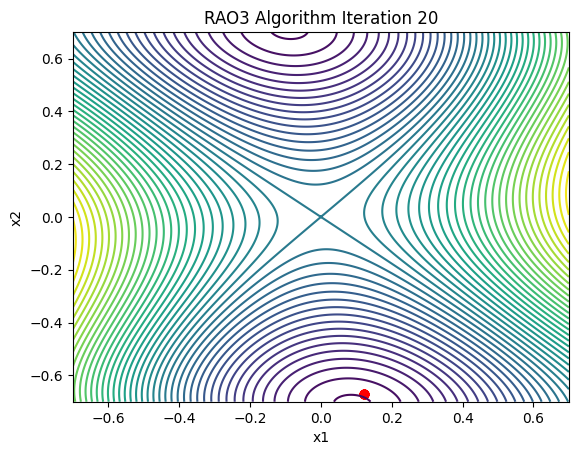

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Fungsi F16
def f16(x1, x2):
    return (4 - 2.1 * x1 ** 2 + (x1 ** 4) / 3) * x1 ** 2 + x1 * x2 + (-4 + 4 * x2 ** 2) * x2 ** 2

# Parameter RAO3
n = 25  # Jumlah agen
max_iter = 20  # Jumlah iterasi
alpha = 0.1  # Learning rate

# Inisialisasi populasi
np.random.seed(42)
pop = np.random.uniform(-0.7, 0.7, (n, 2))
fitness = f16(pop[:, 0], pop[:, 1])

# Simpan data untuk animasi
history = []

# RAO3 Algorithm
for t in range(max_iter):
    history.append(pop.copy())
    for i in range(n):
        a, b = np.random.choice(n, 2, replace=False)
        if fitness[a] < fitness[b]:
            new_sol = pop[a] + alpha * (pop[a] - pop[b]) * np.random.rand()
        else:
            new_sol = pop[b] + alpha * (pop[b] - pop[a]) * np.random.rand()
        new_sol = np.clip(new_sol, -0.7, 0.7)
        new_fitness = f16(new_sol[0], new_sol[1])
        if new_fitness < fitness[i]:
            pop[i] = new_sol
            fitness[i] = new_fitness

history.append(pop.copy())

# Plot hasil dan animasi
X1 = np.linspace(-0.7, 0.7, 400)
X2 = np.linspace(-0.7, 0.7, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = f16(X1, X2)

fig, ax = plt.subplots()
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter(pop[:, 0], pop[:, 1], c='red')

def update(frame):
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    ax.scatter(history[frame][:, 0], history[frame][:, 1], c='red')
    ax.set_title('RAO3 Algorithm Iteration {}'.format(frame))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False)

# Simpan animasi sebagai GIF
writer = PillowWriter(fps=5)
ani.save("rao3_algorithm.gif", writer=writer)

plt.show()
